# Google Colab Lab Assignment -NLP

**Course Name:** Deep Learning (MDM)_Labs DSG-SSB

**Lab Title:** NLP Techniques for Text Classification

**Student Name:** Parth Kulkarni

**Student ID:**202201040007

**Date of Submission:** 01/04/2025

**Group Members**: Rohit Jagtap

Rohan Wagh

Rohan Agarwal


**Objective**
The objective of this assignment is to implement NLP preprocessing techniques and build a text classification model using machine learning techniques.




**Learning Outcomes:**

1. Understand and apply NLP preprocessing techniques such as tokenization, stopword removal, stemming, and lemmatization.

2. Implement text vectorization techniques such as TF-IDF and CountVectorizer.

3. Develop a text classification model using a machine learning algorithm.

4. Evaluate the performance of the model using suitable metrics.

# **Assignment Instructions:**

**Part 1: NLP Preprocessing**

**Dataset Selection:**

Choose any text dataset from **Best Datasets for Text** https://en.innovatiana.com/post/best-datasets-for-text-classification Classification, such as SMS Spam Collection, IMDb Reviews, or any other relevant dataset.

Download the dataset and upload it to Google Colab.

Load the dataset into a Pandas DataFrame and explore its structure (e.g., check missing values, data types, and label distribution).

Text Preprocessing:

Convert text to lowercase.

Perform tokenization using NLTK or spaCy.

Remove stopwords using NLTK or spaCy.

Apply stemming using PorterStemmer or SnowballStemmer.

Apply lemmatization using WordNetLemmatizer.

Vectorization Techniques:

Convert text data into numerical format using TF-IDF and CountVectorizer.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df_train = pd.read_csv('/content/drive/MyDrive/training.csv')
df_test = pd.read_csv('/content/drive/MyDrive/test.csv')
df_valid = pd.read_csv('/content/drive/MyDrive/validation.csv')

print("Training Set:")
print(df_train.info(), "\n")
print(df_train.head(), "\n")

print("Testing Set:")
print(df_test.info(), "\n")
print(df_test.head(), "\n")

print("Validation Set:")
print(df_valid.info(), "\n")
print(df_valid.head(), "\n")

print("Training Set Labels:\n", df_train['label'].value_counts(), "\n")
print("Testing Set Labels:\n", df_test['label'].value_counts(), "\n")
print("Validation Set Labels:\n", df_valid['label'].value_counts(), "\n")


Training Set:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16000 non-null  object
 1   label   16000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 250.1+ KB
None 

                                                text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0
2   im grabbing a minute to post i feel greedy wrong      3
3  i am ever feeling nostalgic about the fireplac...      2
4                               i am feeling grouchy      3 

Testing Set:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2000 non-null   object
 1   label   2000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 31.4+ KB

**Text Processing**

In [ ]:
import shutil
import os
import nltk
nltk_data_path = os.path.expanduser('~/nltk_data')
shutil.rmtree(nltk_data_path, ignore_errors=True)

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')  # For better tokenization


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import spacy

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()
nlp = spacy.load('en_core_web_sm')

# Function for text preprocessing
def preprocess(text):
    text = text.lower()  # Lowercase
    tokens = word_tokenize(text)  # Tokenization
    tokens = [word for word in tokens if word.isalnum()]  # Remove punctuation
    tokens = [word for word in tokens if word not in stop_words]  # Stopword removal
    tokens = [ps.stem(word) for word in tokens]  # Stemming
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    return " ".join(tokens)  # Convert back to text

# Apply preprocessing to all datasets
df_train['processed_text'] = df_train['text'].apply(preprocess)
df_test['processed_text'] = df_test['text'].apply(preprocess)
df_valid['processed_text'] = df_valid['text'].apply(preprocess)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


OSError: No such file or directory: '/root/nltk_data/corpora/stopwords/english'

**Vectorization**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Use TF-IDF
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(df_train['processed_text'])
X_test_tfidf = tfidf.transform(df_test['processed_text'])
X_valid_tfidf = tfidf.transform(df_valid['processed_text'])

# Use CountVectorizer
cv = CountVectorizer()
X_train_cv = cv.fit_transform(df_train['processed_text'])
X_test_cv = cv.transform(df_test['processed_text'])
X_valid_cv = cv.transform(df_valid['processed_text'])

# Labels (assuming the label column is named 'label')
y_train = df_train['label']
y_test = df_test['label']
y_valid = df_valid['label']


**Splitting the Data:**

Divide the dataset into training and testing sets (e.g., 80% training, 20% testing).

**Building the Classification Model:**

Train a text classification model using Logistic Regression, Naïve Bayes, or any other suitable algorithm.

Implement the model using scikit-learn.

**Model Evaluation:**

Evaluate the model using accuracy, precision, recall, and F1-score.

Use a confusion matrix to visualize the results.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train classifier
clf = LogisticRegression()
clf.fit(X_train_tfidf, y_train)

# Predictions
y_pred = clf.predict(X_test_tfidf)


Accuracy: 0.842
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88       581
           1       0.83      0.94      0.88       695
           2       0.76      0.52      0.61       159
           3       0.85      0.79      0.82       275
           4       0.87      0.79      0.83       224
           5       0.85      0.50      0.63        66

    accuracy                           0.84      2000
   macro avg       0.84      0.74      0.77      2000
weighted avg       0.84      0.84      0.84      2000



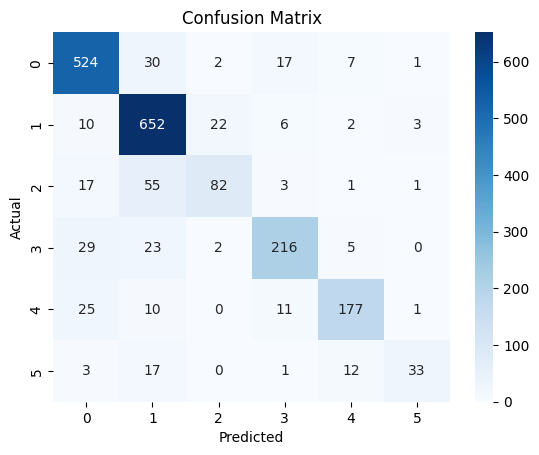

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

**Submission Guidelines:**

**Google Colab Notebook Submission:**

Save your notebook as NLP_Text_Classification_YourName.ipynb.

Ensure all code cells are executed, and the output is visible.

Include proper documentation and comments explaining each step.

**Report Submission (Optional):**

Prepare a short report (2-3 pages) summarizing your approach, findings, and model performance.

Upload the report along with the Colab Notebook.



**Grading Criteria:**

Correct implementation of NLP preprocessing (30%)

Effective use of vectorization techniques (20%)

Model accuracy and performance evaluation (30%)

Code clarity, documentation, and presentation (20%)

**Declaration**

I, Parth Kulkarni, confirm that the work submitted in this assignment is my own and has been completed following academic integrity guidelines. The code is uploaded on my GitHub repository account, and the repository link is provided below:

GitHub Repository Link: [Insert GitHub Link]

Signature: Parth Kulkarni

**Submission Checklist**

✔ Ultralitycs Platform Documentsation Like hel file for Given Task

✔ Code file (Python Notebook or Script)

✔ Dataset or link to the dataset

✔ Visualizations (if applicable)

✔ Screenshots of model performance metrics

✔ Readme File

✔ Evaluation Metrics Details and discussion